# Email Spam Detection using Artificial Intelligence and Machine Learning



In this project I am utilizing Python to create a spam email detection system.
The objective is to create a Python-based program that will ingest email from a data set. The program will preprocess the data by removing HTML tags, tokenizing the text, and reducing words to their root form. The program will then leverage a machine learning algorithm to evaluate the data and determine the likelihood that the email is spam.

I am following the standard data science protocol from data acquisition, preprocessing, feature extraction, model training, evaluation and making predictions.


#### Lets get started!

In [98]:
# Importing necessary libraries over here

!pip install seaborn
!pip install nltk
!pip install scikit-learn

# Pandas for data manipulation
import pandas as pd
import numpy as np




# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# NLTK for text preprocessing tasks like tokenization and stop word removal
import csv 
import string
import nltk
from nltk.tokenize import word_tokenize

from collections import Counter
import matplotlib.pyplot as plt


# Scikit-learn for machine learning algorithms
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [99]:

# Read the dataset
df = pd.read_csv('data/mail_data.csv')

In [100]:
df.shape

(5572, 2)

In [101]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [102]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

Data Visualization

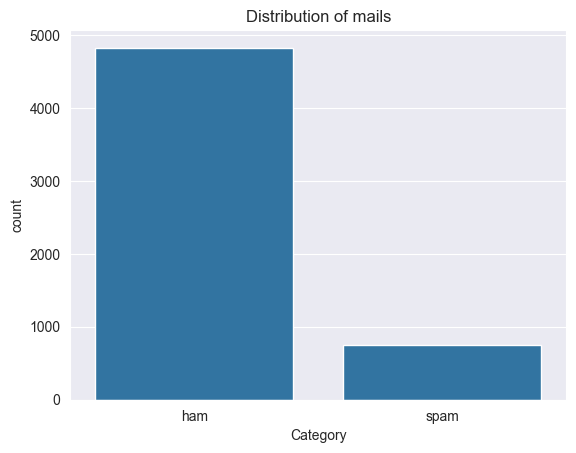

In [103]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

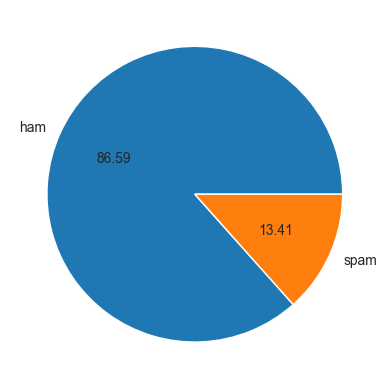

In [104]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

Data Preprocessing

In [105]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [106]:
# Separate the feature (message) and target (category) data

X = df["Message"]
Y = df["Category"]

In [107]:
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()

In [108]:
import os

# Check if the directory exists after renaming
nltk_data_path = '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
print(os.path.exists(nltk_data_path))  # Should return True

True


In [109]:
import nltk
import os

nltk.data.path.append('/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data')

# Verify if the path is correct
print(os.listdir('/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data/tokenizers/punkt'))

from nltk.tokenize import word_tokenize

text = "This is a sample sentence."
tokens = word_tokenize(text, language='english')  # Specify language
print(tokens)


['greek.pickle', 'estonian.pickle', 'turkish.pickle', '.DS_Store', 'polish.pickle', 'PY3', 'russian.pickle', 'czech.pickle', 'portuguese.pickle', 'README', 'dutch.pickle', 'norwegian.pickle', 'malayalam.pickle', 'slovene.pickle', 'english.pickle', 'danish.pickle', 'finnish.pickle', 'swedish.pickle', 'spanish.pickle', 'german.pickle', 'italian.pickle', 'french.pickle']


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/sumanbhandari/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/.venv/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/.venv/share/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
    - '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
**********************************************************************


In [ ]:



import nltk

# Set the NLTK data path to the directory where you placed the punkt dataset
nltk.data.path.append('/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/data/nltk_data')

# Now you can use word_tokenize without downloading it again
from nltk.tokenize import word_tokenize

# Example usage
text = "This is a sample sentence."
tokens = word_tokenize(text)
print(tokens)



In [ ]:
import os
import nltk

# Set the NLTK data path to the correct directory
nltk_data_path = '/Users/sumanbhandari/Desktop/GitHubProjects/Spam Detector/notebook/data/nltk_data'
nltk.data.path.append(nltk_data_path)

# Check if the directory exists and list its contents
print(os.listdir(nltk_data_path))  # List contents of the directory



In [ ]:


# List of stop words from  friend
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", 
    "your", "yours", "yourself", "yourselves", "he", "him", "his", 
    "himself", "she", "her", "hers", "herself", "it", "its", "itself", 
    "they", "them", "their", "theirs", "themselves", "what", "which", 
    "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", 
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", 
    "or", "because", "as", "until", "while", "of", "at", "by", "for", 
    "with", "about", "against", "between", "into", "through", "during", 
    "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", 
    "once", "here", "there", "when", "where", "why", "how", "all", "any", 
    "both", "each", "few", "more", "most", "other", "some", "such", "no", 
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", 
    "s", "t", "can", "will", "just", "don", "should", "now", "d", "ll", 
    "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", 
    "hadn", "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", 
    "shan", "shouldn", "wasn", "weren", "won", "wouldn"
])

# Tokenize and remove stop words from spam_words
tokens = word_tokenize(" ".join(spam_words))  # Ensure `spam_words` is defined
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Printing or using filtered_tokens as needed
print(filtered_tokens)


In [ ]:
filtered_word_freq = Counter([word.lower() for word in filtered_tokens if word.lower() not in stop_words and word.isalpha()])

# Plot the top 10 most common words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*filtered_word_freq.most_common(10)), color='b')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()


Training the ML Models

In [ ]:
print(X)

In [ ]:
print(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
# Print the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Initialize TF-IDF Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
# Feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
# Convert Y_train and Y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

Model Selection

#  Create and Fit Logistic Regression Model


In [ ]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

In [ ]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_features)

In [ ]:
#Model Evaluation
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

Testing the model with an email messages

In [ ]:
new_mail=["Congratulations, you got admitted to NKU for the Fall 2024 for Bachelors in Data Science"]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

# Confusion matrix is used to represent the accuracy of classification models. It is used on a set of test data where true values are known. It displays true positive, true negative, false positive and false negative numbers.
# confusion_matrix(Y_test, predict_test_data): This function computes the confusion matrix using the true labels (Y_test) and the predicted labels (predict_test_data).
 # plt.figure(figsize=(6, 4)): It Establishes the size of the figure where the heatmap will be plotted.
#  sns.heatmap(): It draws a heatmap using Seaborn, visualizing the confusion matrix with annotations (annot=True) and a specific format (fmt="d" for integer format).
 # plt.xlabel, plt.ylabel, plt.title: They label the heatmap with appropriate axis labels and a title.
# plt.show(): It displays the generated heatmap.


In [ ]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

Neural Network

# Neural networks, such as the MLP Classifier used here, comprise interconnected layers of neurons facilitating complex computations. These networks process data through multiple hidden layers, employing activation functions for forward propagation. Model error is computed from the predicted output, followed by backpropagation—a process adjusting network weights to minimize error. This iterative process aims to optimize the model's performance by learning and adapting to data patterns, enhancing accuracy in classification tasks.
# A neural network known as MLP(Multi-Layer-Perceptron) is utilized for classification tasks.

In [ ]:
mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000) 
mlp_classifier_model.fit(X_train_features, Y_train)  

prediction = mlp_classifier_model.predict(X_test_features)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(Y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(Y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(Y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(Y_test, prediction)))

Multinomial Naive Bayes

# A Multinomial Naive Bayes is used for classification purpose. It's a probabilistic classification method based on Bayes theorem designed for features like count or frequencies. It calculates probability for different model based on word count or frequencies in text. It is favored for text classification as it performs well with data sets with high dimensionality.
# 1st Multinomial Naive Bayes classifier is initialized and is trained using the feature X_train_features. Utilizing the trained model, prediction is done for the test data.

In [ ]:
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(X_train_features, Y_train)  # Train the model

prediction = multinomial_nb_model.predict(X_test_features)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(Y_test, prediction)) )
print("Precision score: {}". format(precision_score(Y_test, prediction)) )
print("Recall score: {}". format(recall_score(Y_test, prediction)))
print("F1 score: {}". format(f1_score(Y_test, prediction)))

In [ ]:
# save the trained model
import joblib
joblib.dump(multinomial_nb_model, '../model/spam_detector.sav')

In [ ]:
import os
print(os.getcwd())

Bernoulli Naive Bayes

# A Bernouli Naive Bayes is also used for classification purpose.
# Bernouli Naive Bayes is used for classification of binary features like 'Yes' or 'No', '1' or '0',etc. It calculates probabilities for different class labels by looking whether specific words are present or not. Features are independent of each other. Difference between Bernouli Naive Bayes and Multinomial Naive Bayes is that Bernouli Naive Bayes is used for classification of binary features like '0' or '1' whereas Multinomial Naive Bayes is used for features that represents count or frequencies. 
# 1st Bernouli Naive Bayes classifier is initialized and is trained using the feature X_train_features. Utilizing the trained model, prediction is done for the test data.

In [ ]:
bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(X_train_features, Y_train)

prediction = bernoulli_nb_model.predict(X_test_features)

#Evaluation
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(Y_test, prediction)) )
print("Precision score: {}". format(precision_score(Y_test, prediction)) )
print("Recall score: {}". format(recall_score(Y_test, prediction)))
print("F1 score: {}". format(f1_score(Y_test, prediction)))

Confusion Matrix

In [ ]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("MLP Classifier", mlp_classifier_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(X_test_features)
    cm = confusion_matrix(Y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

Metric Comparision Heatmap

# It allows comparision of different models based on multiple evaluation metrics easily. Color intensity on heat map represents performance of each model where high score (1 or closest to 1 values )are represented with bright colors. All three models have similiar kind of performance in this case with slight difference.

In [ ]:
#Metric Comparison Heatmap
metric_data = []
for model_name, model in models:
    prediction = model.predict(X_test_features)
    accuracy = accuracy_score(Y_test, prediction)
    precision = precision_score(Y_test, prediction)
    recall = recall_score(Y_test, prediction)
    f1 = f1_score(Y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()



All three models perform exceptionally well, with high accuracy scores.

The final choice of model always depend upon what is needed to be filtered & hence model can be adjusted to improve recall or precision.

If you want to minimize the number of false negatives i.e spam messages don't end up in the user's inbox you would like to have high Recall.
On the other hand with high precision(false negatives), one might miss important messages because the model is overly cautious in classifying messages as spam.